In [457]:
__author__ = 'Ryan Garry'
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [458]:
def makeint(x):
    return round(10*x)

In [459]:
mpl.style.use('_mpl-gallery')
plt.rcParams['figure.figsize'] = [5, 4]

# read the data
xlabels = ["sepal length [cm]","sepal width [cm]","petal length [cm]","petal width [cm]"]
ylabels = ["Label"]
df = pd.read_csv("iriscorrected.csv", names = xlabels + ylabels)
x = df[xlabels]
y = df[ylabels]
df.head()
#x.info()
#y.info()

,sepal length [cm],sepal width [cm],petal length [cm],petal width [cm],Label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [460]:
def findLimits(input):
    if input == 0:
        lower = 4
        upper = 8
    elif input == 1:
        lower = 2
        upper = 5
    elif input == 2:
        lower = 1
        upper = 7
    elif input == 3:
        lower = 0
        upper = 3
    return lower, upper

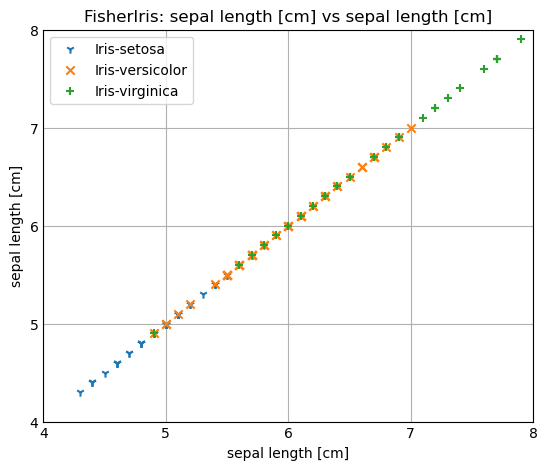

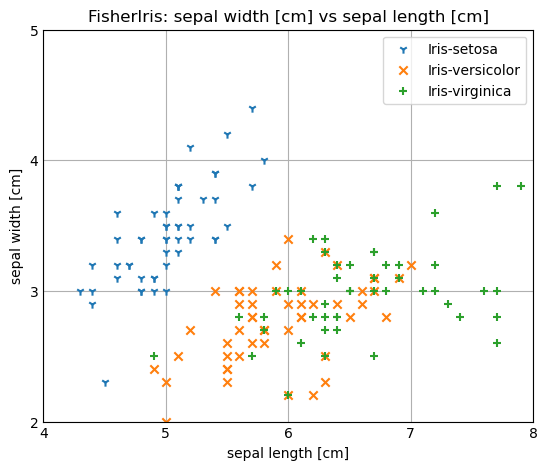

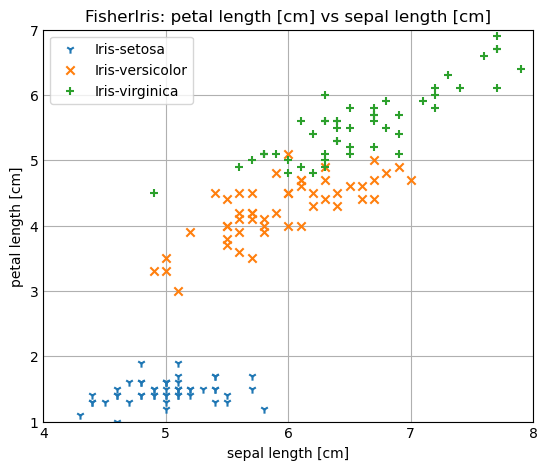

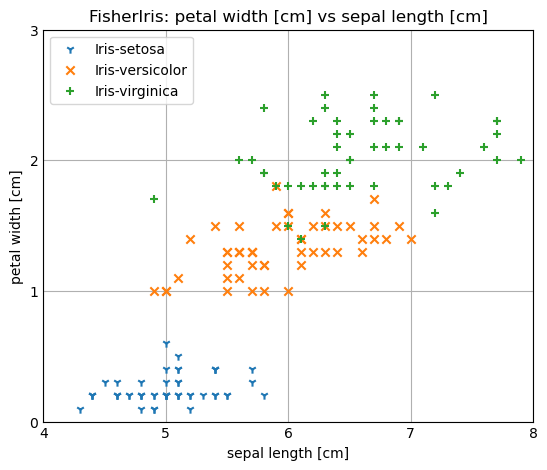

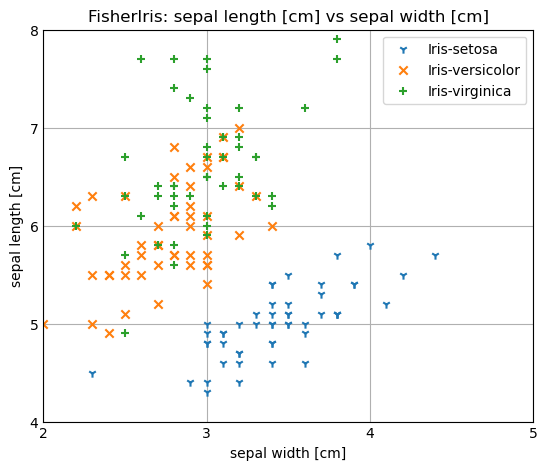

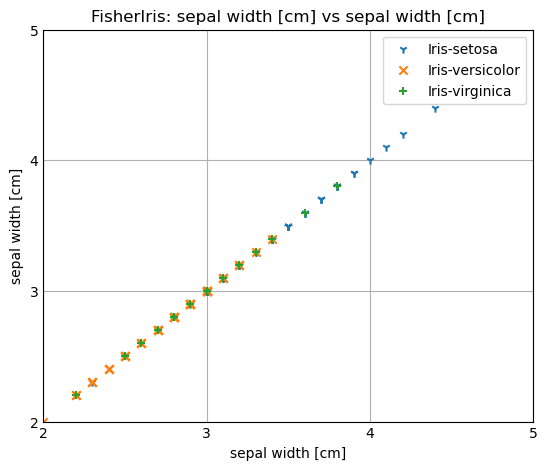

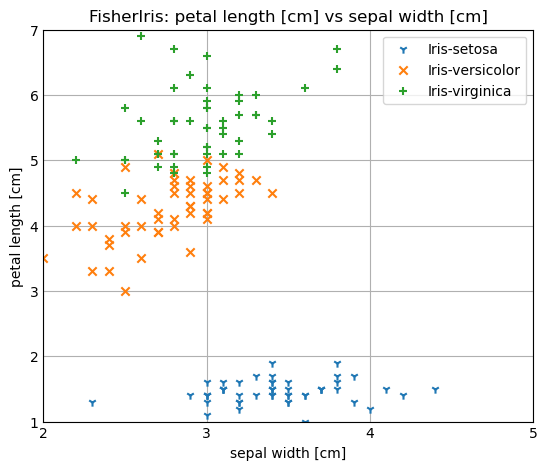

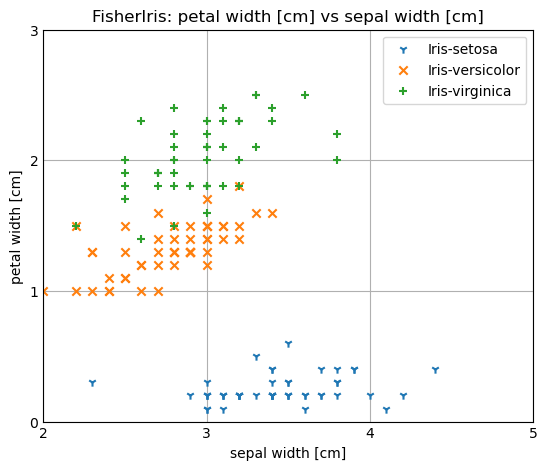

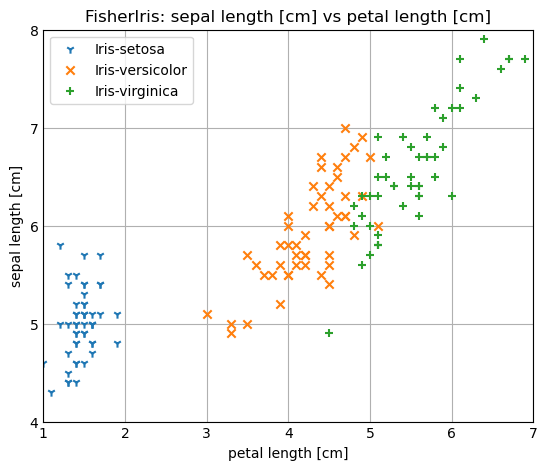

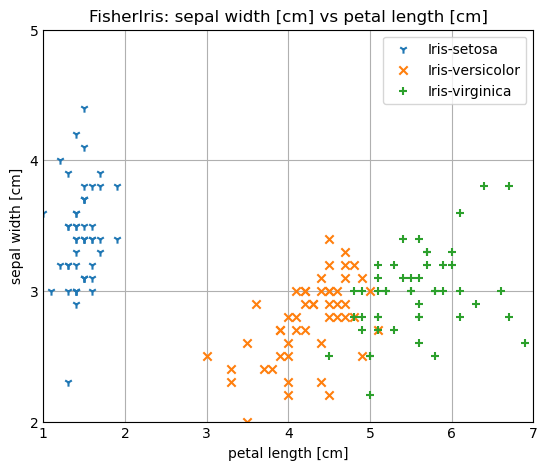

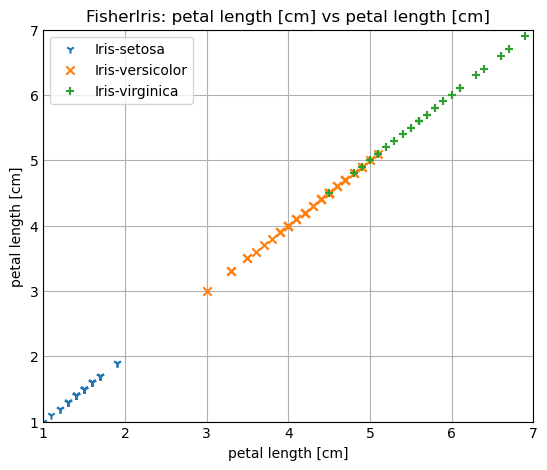

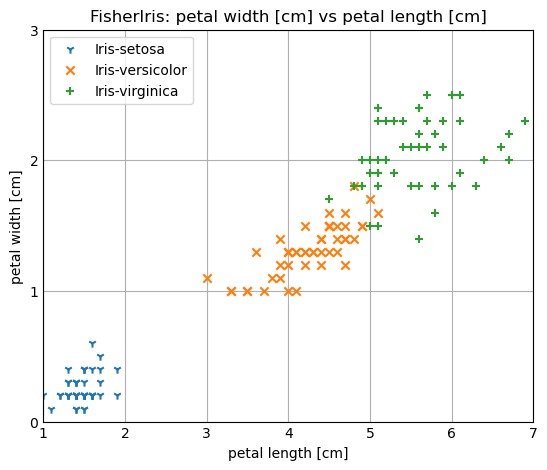

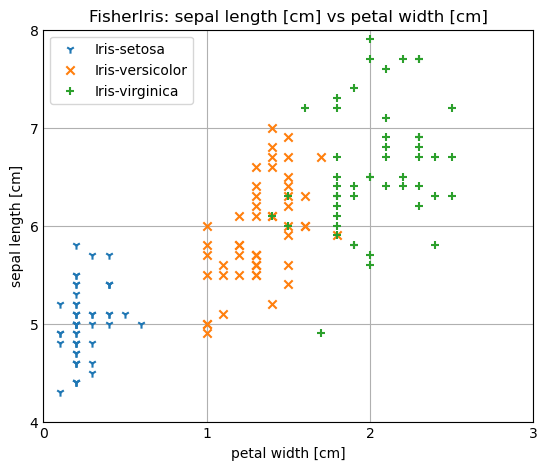

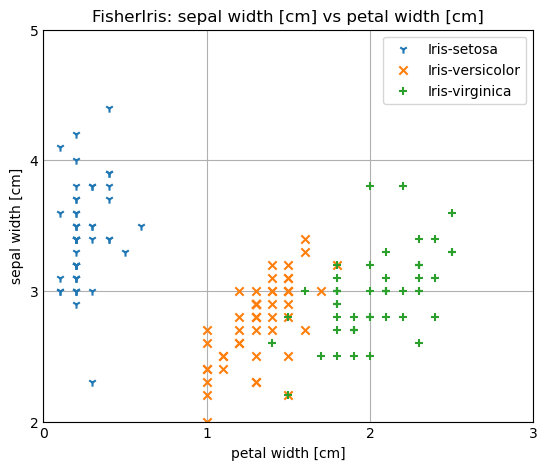

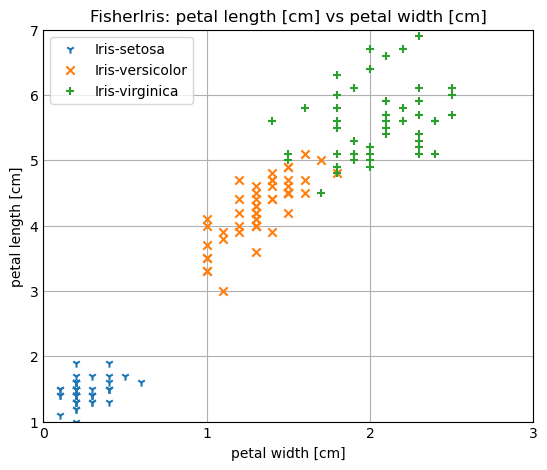

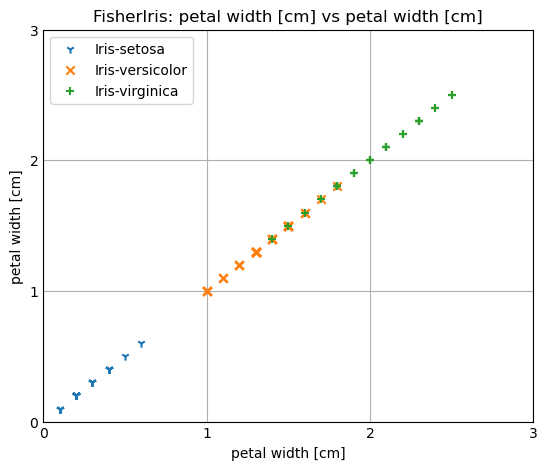

In [461]:
unique_vals = df['Label'].unique()
df['Label_N'] = df['Label'].replace(to_replace=unique_vals, value= list(range(len(unique_vals))))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
markers = ['1','x','+']
for i in range(0,len(xlabels)):
    for j in range(0,len(xlabels)):
        fig, ax = plt.subplots()
        for k in range(0,df['Label'].nunique()):
            ax.scatter(data=df.loc[df['Label_N'] == k],x=xlabels[i],y=xlabels[j],
                            label=unique_vals[k],c=colors[k], marker=markers[k])   
        [xlower, xupper] = findLimits(i)
        [ylower, yupper] = findLimits(j)
        ax.set(xlim=(xlower, xupper), xticks=np.arange(xlower, xupper+1), 
                ylim=(ylower, yupper), yticks=np.arange(ylower, yupper+1))
        plt.title(f'FisherIris: {xlabels[j]} vs {xlabels[i]}')
        plt.xlabel(f'{xlabels[i]}')
        plt.ylabel(f'{xlabels[j]}')
        plt.legend()
        #plt.savefig(f'{j+1} vs {i+1}',bbox_inches='tight')
        #plt.show()


In [484]:
# load feature 3,4 dataset
x34labels = ["petal length [cm]","petal width [cm]"]
y34labels = ["Label"]
df34 = pd.read_csv("irisf34.csv", names = x34labels + y34labels)
X34 = df34[x34labels]
X34 = makeint(X34)
X34 = X34.astype('int')
print(X34.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   petal length [cm]  150 non-null    int64
 1   petal width [cm]   150 non-null    int64
dtypes: int64(2)
memory usage: 2.5 KB
None


In [463]:
unique_vals = df34['Label'].unique()
#print(unique_vals)
df34['Label_N'] = df34['Label'].replace(to_replace=unique_vals, value= list(range(len(unique_vals))))
y34 = df34['Label_N']
print(y34.info())
#y34.tail()
print(unique_vals)

<class 'pandas.core.series.Series'>
RangeIndex: 150 entries, 0 to 149
Series name: Label_N
Non-Null Count  Dtype
--------------  -----
150 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB
None
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [482]:
Xtest = [[2,.8],[4,.8],[6.5,2.5],[4.5,1.7],[4.8,1.8],[5.0,1.8],[5.0,1.5]]
print(len(Xtest[0]))

for k in range(len(Xtest)):
    for j in range(len(Xtest[0])):
        Xtest[k][j] = makeint(Xtest[k][j])
print(Xtest)
#Xtest = makeint(Xtest)
ytest = [0,1,2,2,2,1,2]
print(np.shape(Xtest))
print(np.shape(ytest))

2
[[20, 8], [40, 8], [65, 25], [45, 17], [48, 18], [50, 18], [50, 15]]
(7, 2)
(7,)


   petal length [cm]  petal width [cm]
0                 14                 2
1                 14                 2
2                 13                 2
3                 15                 2
4                 14                 2


/opt/homebrew/Caskroom/miniforge/base/envs/ece759/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


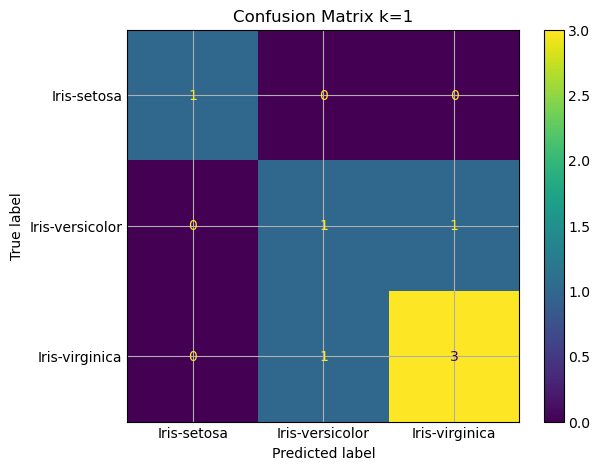

k = 1
Error: 0.2857142857142857
0.42857142857142855
Test vector 1: Prediction: Iris-setosa
Test vector 2: Prediction: Iris-versicolor
Test vector 3: Prediction: Iris-virginica
Test vector 4: Prediction: Iris-virginica
Test vector 5: Prediction: Iris-versicolor
Test vector 6: Prediction: Iris-virginica
Test vector 7: Prediction: Iris-virginica


In [505]:
print(X34.head())
k=1
knn = KNeighborsClassifier(n_neighbors=k,metric="manhattan", n_jobs = -1)
knn.fit(X34, y34)
ytestpred = knn.predict(Xtest)
cm = confusion_matrix(ytest, ytestpred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=unique_vals)
disp.plot()
plt.title(f"Confusion Matrix k={k}")
plt.show()
p=1
print(f'k = {k}')
acc = accuracy_score(ytest, ytestpred)
print(f'Error: {1-acc}')
print(3/7)
for i in ytestpred:
    print(f"Test vector {p}: Prediction: {unique_vals[i]}")
    p += 1
#print("truth:")
#for j in ytest:
#    print(unique_vals[j])
#print(ytestpred)
#print(ytest)

In [466]:
# for milestone 2 question 4, checking for duplicates at (4.9,1.5) to explain why k=3 chose veriscolor
df34[(df34["petal length [cm]"] == 4.9) & (df34["petal width [cm]"] == 1.5)].head()

,petal length [cm],petal width [cm],Label,Label_N
52,4.9,1.5,Iris-versicolor,1
72,4.9,1.5,Iris-versicolor,1


In [467]:
type(df)

pandas.core.frame.DataFrame

In [468]:
class KthPerClass():
    """Classifier based on kNN that finds the kth nearest training vector per class 
    based on the manhattan distance and in the event of a tie chooess the class that 
    appears earlier in the training data"""
    
    def __init__(self, k: int = 1) -> None:
        self.k = k

    def fit(self, X: pd.DataFrame, y: pd.DataFrame) -> None:
        """Stores X=features and y=labels as training data"""
        assert type(X) is pd.core.frame.DataFrame, 'X is not a DataFrame'
        assert type(y) is pd.core.frame.DataFrame, 'y is not a DataFrame'
        self._x_train = X
        self._y_train = y
        self._x_train_columns = list(self._x_train.columns)
        self._y_train_columns = list(self._y_train.columns)
        self.unique_y_values = self._y_train.squeeze().unique()
        self.train_df = pd.concat([self._x_train, self._y_train],
                                  ignore_index=False, axis=1)

    @staticmethod
    def _manhattan_distance(x: list,y: list) -> float:
        """Returns the manhattan, aka city block, distance between two vectors x and y
        inputs are lists"""
        assert len(x) == len(y), "The dimensions of x do not match y"
        distance = 0
        for x_item, y_item in zip(x,y):
            distance += abs(x_item-y_item)
        return distance
    
    def predict(self, X: pd.DataFrame) -> np.ndarray:
        """Returns the predicted labels y_pred for the test vectors X"""
        # create a new col called distance using manhattan distance
        assert type(X) is pd.core.frame.DataFrame, 'X is not a DataFrame'
        X = X.values.tolist()
        y_list = []
        for x in X:
            train_df = self.train_df
            train_df['distance'] = self.train_df.apply(
                lambda row: self._manhattan_distance(
                    x,
                    row[self._x_train_columns].tolist()),
                    axis=1)
            # for each class: filter class and sort in ascending order
            kth_distance_per_class = []
            for i in self.unique_y_values:
                filtered_train_df = train_df[train_df[self._y_train_columns[0]] == i]
                sorted_train_df = filtered_train_df.sort_values('distance',ignore_index=True)
                kth_distance = sorted_train_df['distance'].iloc[self.k-1]
                kth_distance_per_class.append(kth_distance)
            y = kth_distance_per_class.index(min(kth_distance_per_class))
            y_list.append(y)
            #print(kth_distance_per_class)
        y_pred = np.array(y_list)
        return y_pred
        


In [491]:
Xtest = pd.DataFrame(Xtest).astype('int')
print(Xtest.head())
print(X34.info())

    0   1
0  20   8
1  40   8
2  65  25
3  45  17
4  48  18
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   petal length [cm]  150 non-null    int64
 1   petal width [cm]   150 non-null    int64
dtypes: int64(2)
memory usage: 2.5 KB
None


In [513]:
kpc = KthPerClass(k=2) 
kpc.fit(X34,y34.to_frame())
y_pred = kpc.predict(Xtest)

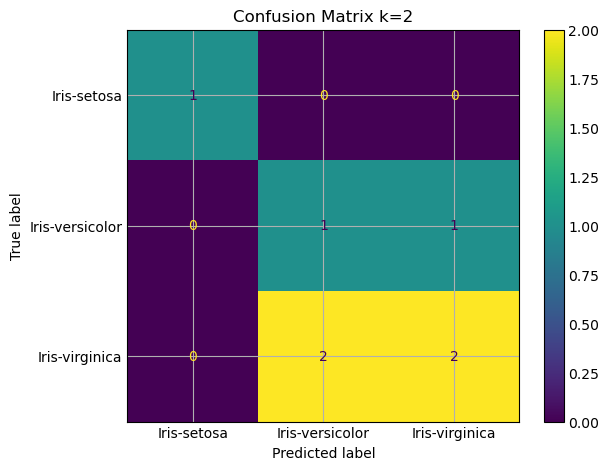

k = 2
Error: 0.4285714285714286
Test vector 1: Prediction: Iris-setosa
Test vector 2: Prediction: Iris-versicolor
Test vector 3: Prediction: Iris-virginica
Test vector 4: Prediction: Iris-versicolor
Test vector 5: Prediction: Iris-virginica
Test vector 6: Prediction: Iris-virginica
Test vector 7: Prediction: Iris-versicolor


In [514]:
cm = confusion_matrix(ytest, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=unique_vals)
disp.plot()
plt.title(f"Confusion Matrix k={kpc.k}")
plt.show()
p=1
print(f'k = {kpc.k}')
acc = accuracy_score(ytest, y_pred)
print(f'Error: {1-acc}')
for i in y_pred:
    print(f"Test vector {p}: Prediction: {unique_vals[i]}")
    p += 1

In [492]:
def split_data(X,y,n_train):
    """Splits data into train and test with n_train vectors 
    per class and the remaining test vectors
    Returns x_train, y_train, 
    x_test, y_test"""
    unique_y_values = y.squeeze().unique()
    x = X
    y = y
    x_columns = list(x.columns)
    y_columns = list(y.columns)
    df = pd.concat([x, y], ignore_index=False, axis=1)
    x_train = pd.DataFrame(columns = x_columns)
    y_train = pd.DataFrame(columns = y_columns)
    x_test = pd.DataFrame(columns = x_columns)
    y_test = []
    #y_test = pd.DataFrame(columns = y_columns)
    #print(y_train.head(5))
    for i in unique_y_values:
                filtered_df = df[df[y_columns[0]] == i]
                class_len = len(filtered_df)
                n_test = class_len - n_train
                x_train = pd.concat([x_train, filtered_df[x_columns].head(n_train)])
                y_train = pd.concat([y_train, filtered_df[y_columns].head(n_train)])
                x_test = pd.concat([x_test, filtered_df[x_columns].tail(n_test)])
                y_test.append(filtered_df[y_columns].tail(n_test).values.tolist())
                #y_test = pd.concat([y_test, filtered_df[y_columns].tail(n_test)])
    #print(y_test.shape)
    #print(y_test.shape)
    x_train = x_train.astype(int)
    x_test = x_test.astype(int)
    y_train = y_train.astype(int)
    y_test = np.array(y_test).flatten()
    return x_train, y_train, x_test, y_test
    

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Error: 0.033333333333333326


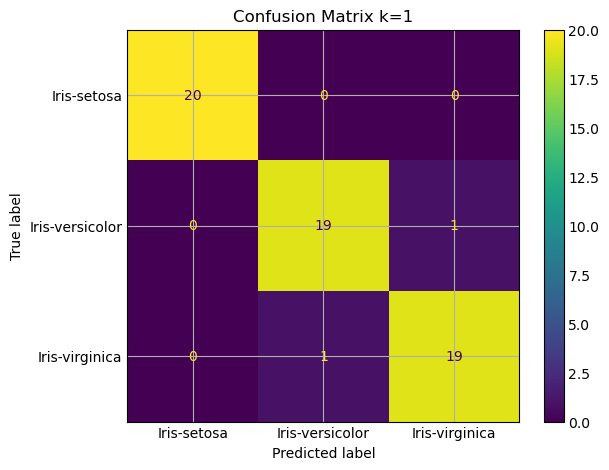

In [473]:
n_train = 30

x_train1, y_train1, x_test1, y_test1 = split_data(X34,y34.to_frame(),n_train)
kpc1 = KthPerClass(k=1)
kpc1.fit(x_train1,y_train1)
y_pred1 = kpc1.predict(x_test1)
print(y_pred1)
print(y_test1)
acc1 = accuracy_score(y_test1, y_pred1)
print(f'Error: {1-acc1}')
cm1 = confusion_matrix(y_test1, y_pred1)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=unique_vals)
disp1.plot()
plt.title(f"Confusion Matrix k={kpc1.k}")
plt.show()

In [496]:
n_train = 30
_x_train, _y_train, x_test, y_test = split_data(X34,y34.to_frame(),n_train)
print(_y_train.squeeze().unique())
print(_x_train.info())
print(x_test.info())


[0 1 2]
<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, 0 to 129
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   petal length [cm]  90 non-null     int64
 1   petal width [cm]   90 non-null     int64
dtypes: int64(2)
memory usage: 2.1 KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 30 to 149
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   petal length [cm]  60 non-null     int64
 1   petal width [cm]   60 non-null     int64
dtypes: int64(2)
memory usage: 1.4 KB
None


In [497]:
kpc_err = []
knn_err = []
for g in range(1,17+1):
    kpc = KthPerClass(k=g)
    kpc.fit(_x_train,_y_train)
    kpc.y_pred = kpc.predict(x_test)
    kpc.acc = accuracy_score(y_test, kpc.y_pred)
    kpc.err = 1-kpc.acc
    kpc_err.append(kpc.err)
    #print(f'KthPerClass(k = {g}) Error: {kpc.err}')
    knn = KNeighborsClassifier(n_neighbors=g, metric="manhattan", n_jobs = -1)
    knn.fit(_x_train,_y_train.squeeze())
    knn.y_pred = knn.predict(x_test)
    knn.acc = accuracy_score(y_test, knn.y_pred)
    knn.err = 1-knn.acc
    knn_err.append(knn.err)
    #print(f'kNN(k = {g}) Error: {knn.err}')
    

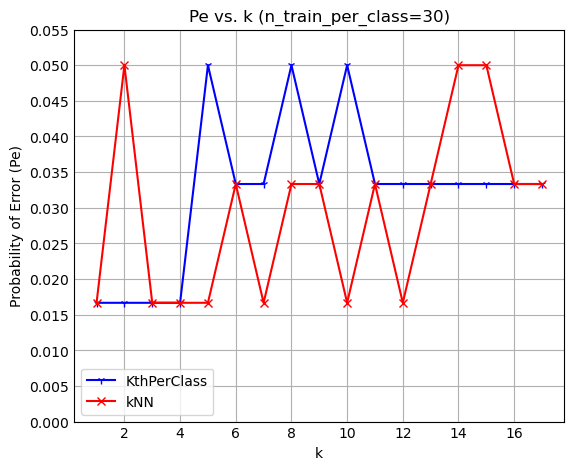

In [498]:
k_list = list(range(1,17+1))
fig, ax = plt.subplots()
plt.plot(k_list, kpc_err, color='b',marker=markers[0],label='KthPerClass')
plt.plot(k_list, knn_err,color='r',marker=markers[1],label='kNN')
ax.set(ylim=(0, 0.055), yticks=np.arange(0, 0.055+0.005,0.005))
plt.title(f"Pe vs. k (n_train_per_class={n_train})")
plt.xlabel('k')
plt.ylabel('Probability of Error (Pe)')
plt.legend()
plt.show()